In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.ensemble import RandomForestClassifier

Mounted at /content/gdrive


In [215]:
data = pd.read_csv('/content/gdrive/MyDrive/telecom_churn_3.csv')
column_to_move = data.pop("Customer Status")
data.insert(len(data.columns), "Customer Status", column_to_move)
data.head(2)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,NaN,NaN,Stayed
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,NaN,NaN,Stayed


In [216]:
data_copy = data.copy() 
data_copy.drop(columns= ['Customer ID'], axis=1, inplace=True)

# Numeric columns
numeric_columns = []
for i in data.describe():
  numeric_columns.append(i)
# filling missing values in numerical data with mean : Simple Imputer
for cols in numeric_columns:
  data_copy[cols].fillna(data[cols].mean())


def encode(df,column_name):# label encoding on given column and returns dictionary for later use (for all but churn ~)
  if(column_name in ['Churn Reason','Churn Category']):
    df.loc[df["Customer Status"] == "Stayed",column_name] = "Not Valid"
    df.loc[df["Customer Status"] == "Joined",column_name] = "Not Valid"

  unique_val = df[column_name].unique()
  for i in range(len(unique_val)):
    if(type(unique_val[i])!= str and math.isnan(unique_val[i])):
        unique_val = np.delete(unique_val, i)
        break

  
  label_value = {} 
  value_label = {}
  for i in range(0,len(unique_val)):
          label_value[unique_val[i]] = i
          value_label[i] = unique_val[i]

  df[column_name].replace(label_value,inplace=True)
  return value_label

def replace_labels(df,cname,label_mapping):
    df[cname].replace(label_mapping,inplace=True)


# Categorical Cols
categorical_columns = [] 
for i in data_copy.columns:
  if(i not in numeric_columns):
    categorical_columns.append(i)
  
label_mapping = []   # 
for i in categorical_columns:
  label_mapping.append(encode(data_copy,i))

# Use:KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
imputed_array = imputer.fit_transform(data_copy)


data_copy = pd.DataFrame(imputed_array,columns = data_copy.columns)   # use df for computations
df = data_copy.copy()

data_copy.head(2)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,0.0,37.0,0.0,0.0,0.0,93225.0,34.827662,-118.999073,2.0,9.0,...,0.0,65.6,593.3,0.00,0.0,381.51,974.81,0.0,0.0,0.0
1,1.0,46.0,1.0,0.0,1.0,91206.0,34.162515,-118.203869,0.0,9.0,...,0.0,-4.0,542.4,38.33,10.0,96.21,610.28,0.0,0.0,0.0


In [217]:
data_copy['Customer Status'].value_counts()

0.0    4720
1.0    1869
2.0     454
Name: Customer Status, dtype: int64

In [218]:
idx = 0
for i in categorical_columns:
  replace_labels(df,i,label_mapping[idx])
  idx+=1
df.head()

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason,Customer Status
0,Female,37.0,Yes,0.0,Frazier Park,93225.0,34.827662,-118.999073,2.0,9.0,...,Credit Card,65.6,593.30,0.00,0.0,381.51,974.81,Not Valid,Not Valid,Stayed
1,Male,46.0,No,0.0,Glendale,91206.0,34.162515,-118.203869,0.0,9.0,...,Credit Card,-4.0,542.40,38.33,10.0,96.21,610.28,Not Valid,Not Valid,Stayed
2,Male,50.0,No,0.0,Costa Mesa,92627.0,33.645672,-117.922613,0.0,4.0,...,Bank Withdrawal,73.9,280.85,0.00,0.0,134.60,415.45,Competitor,Competitor had better devices,Churned
3,Male,78.0,Yes,0.0,Martinez,94553.0,38.014457,-122.115432,1.0,13.0,...,Bank Withdrawal,98.0,1237.85,0.00,0.0,361.66,1599.51,Dissatisfaction,Product dissatisfaction,Churned
4,Female,75.0,Yes,0.0,Camarillo,93010.0,34.227846,-119.079903,3.0,3.0,...,Credit Card,83.9,267.40,0.00,0.0,22.14,289.54,Dissatisfaction,Network reliability,Churned


In [219]:
# rerun
df1=data_copy.copy()
indexAge = df1[ (df1['Customer Status'] == 2)].index
df1.drop(indexAge , inplace=True)

X = df1.drop('Customer Status',axis = 1)
X.head(2)

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn Reason
0,0.0,37.0,0.0,0.0,0.0,93225.0,34.827662,-118.999073,2.0,9.0,...,0.0,0.0,65.6,593.3,0.00,0.0,381.51,974.81,0.0,0.0
1,1.0,46.0,1.0,0.0,1.0,91206.0,34.162515,-118.203869,0.0,9.0,...,1.0,0.0,-4.0,542.4,38.33,10.0,96.21,610.28,0.0,0.0


In [220]:
y = df1['Customer Status']
print(y.value_counts())
# replacing Joined(2) by Stayed(1)
y.replace(2,0,inplace=True)
# target_names = ['Stayed', 'Churned', 'Joined']
target_names = ['Stayed', 'Churned']

0.0    4720
1.0    1869
Name: Customer Status, dtype: int64


In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

Feature Selection

In [222]:
# Using Multi-Colinearity
correlated_features = set()
correlation_matrix = X_train.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features,len(correlated_features))
train_X=X_train.copy()

X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

for col in correlated_features:
  numeric_columns.remove(col)

{'Longitude', 'Latitude', 'Total Revenue'} 3


In [223]:
# Variance Thresholf
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.1)
train = selector.fit_transform(X_train[numeric_columns])

low_var = []
for col in (X_train[numeric_columns].columns):
    if(col not in (X_train[numeric_columns].columns[selector.get_support()])):
        low_var.append(col)

low_var

X_train.drop(low_var,axis=1,inplace=True)
X_test.drop(low_var,axis=1,inplace=True)

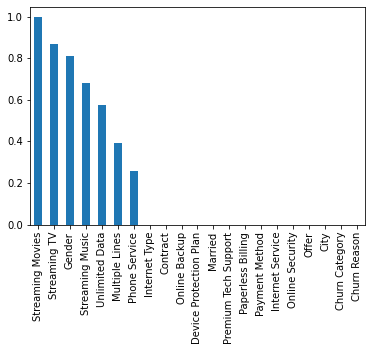

In [224]:
# chi-square for categorical
categorical_columns.remove('Customer Status')
from sklearn.feature_selection import chi2
chi_scores = chi2(X_train[categorical_columns],y_train)
p_values = pd.Series(chi_scores[1],index = X[categorical_columns].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [225]:
independent_cols = [] # those with high p-value
for col in p_values.index:
  if(p_values[col] > 0.75):
    independent_cols.append(col)

X_train.drop(labels=independent_cols,axis=1,inplace=True)
X_test.drop(labels=independent_cols,axis=1,inplace=True)

In [226]:
# Feature Scaling
for i in numeric_columns:
  if(i in X_train.columns):
    mean = X_train[i].mean()
    std = X_train[i].std()
    X_train[i] = (X_train[i]-mean)/std
    X_test[i] = ((X_test[i]-mean)/std)

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [228]:
from sklearn.model_selection import cross_val_score
def cross_validation(model1, _X, _y, _cv=5):
  metrics = ['accuracy','precision','recall', 'f1']
  # K fold cross validation hai with 5 folds
  for i in metrics:
      print(i," : ", cross_val_score(estimator=model1, X=_X, y=_y,scoring=i,cv=5).mean())

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def get_roc_auc(model1,_X,_y):
  model1.fit(_X,_y) 
  _y_pred = model1.predict_proba(_X) 
  pos_probs = _y_pred[:,1]
  roc_auc = roc_auc_score(_y,pos_probs)
  print('Model ROC AUC score is %.3f' % roc_auc)
  fpr,tpr, _ = roc_curve(_y,pos_probs)

  plt.plot(fpr,tpr,marker='.',label='For the given model')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend() 
  plt.show()

ANN

Accuracy 0.9438543247344461
Recall 0.8048128342245989
Precision 0.9966887417218543
F1 Score 0.8905325443786982
Model ROC AUC score is 0.978


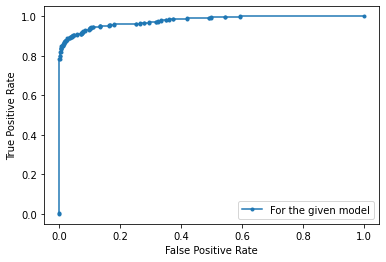

In [277]:
model = MLPClassifier(hidden_layer_sizes=(256,32),activation='relu')
y_pred = model.fit(X_train, y_train).predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred))
print('F1 Score',f1_score(y_test, y_pred)) 
get_roc_auc(model,X_test,y_test) 

Accuracy 0.9165402124430956
Recall 0.7058823529411765
Precision 1.0
F1 Score 0.8275862068965517
Model ROC AUC score is 0.726


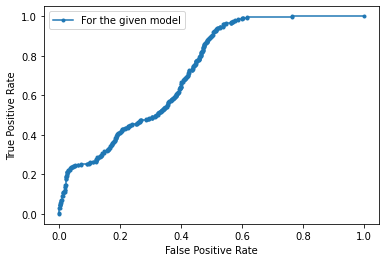

In [287]:
model = MLPClassifier(hidden_layer_sizes=(256,32),activation='logistic')
y_pred = model.fit(X_train, y_train).predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred))
print('F1 Score',f1_score(y_test, y_pred)) 
get_roc_auc(model,X_test,y_test) 

Accuracy 0.8793626707132018
Recall 0.5748663101604278
Precision 1.0
F1 Score 0.7300509337860781
Model ROC AUC score is 0.905


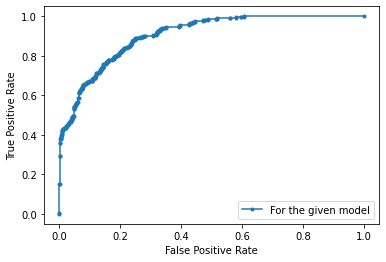

In [291]:
model = MLPClassifier(hidden_layer_sizes=(256,32),activation='tanh')
y_pred = model.fit(X_train, y_train).predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred))
print('F1 Score',f1_score(y_test, y_pred)) 
get_roc_auc(model,X_test,y_test) 

Accuracy 0.9180576631259484
Recall 0.9572192513368984
Precision 0.7955555555555556
F1 Score 0.8689320388349515
Model ROC AUC score is 0.779


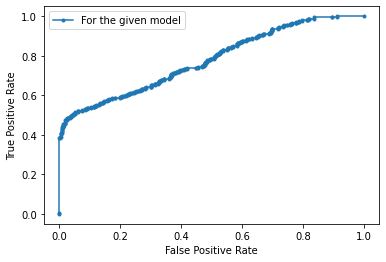

In [293]:
model = MLPClassifier(hidden_layer_sizes=(256,32),activation='identity')
y_pred = model.fit(X_train, y_train).predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))
print('Recall',recall_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred))
print('F1 Score',f1_score(y_test, y_pred)) 
get_roc_auc(model,X_test,y_test) 